# question3


In [1]:
import copy
def FindMin(path,graph , graph2 , i, j,path2):
    number = len(graph2)
    list1 = graph[i]
    list2 = []
    for m in range(number):
        list2.append(graph2[m][j])
    numbermin = 0
    first = True
    added = -1
    for k in range(number): 
        if list1[k] == float('inf') or list2[k] == float('inf'):
            continue
        elif list1[k] == 0 or list2[k] == 0 :
            continue
        else:
            if(first):
                added = k 
                numbermin = list1[k] + list2[k]
                first = False
            else:
                numbermin = min(numbermin, list1[k]+list2[k])
                if(numbermin == list1[k] + list2[k]):
                    added = k 
    if(added != -1):
        add = copy.deepcopy(path2[i][added])
        path[i][j] = add
        path[i][j].append(j)
    if numbermin == 0:
        return path,float('inf')
    else:
        return path,numbermin


def recursive (path,tool , graph , graph2 , number,path2):
    m2 =[]
    for i in range(number):
        col = []
        for j in range(number):
            path,result = FindMin(path,graph , graph2, i, j,path2)
            col.append(result)
        m2.append(col)
    if(tool -1 > 1):
        path2=[]
        for i in range (len(path)):
            col = []
            for j in range(len(path)):
                col.append(path[i][j])
            path2.append(col)
        return recursive(path, tool-1, m2, graph2,number,path2)
    else:
        return path,m2


def floyd_warshall_with_path(W, start, end):
    n = len(W) 
    D =[]
    for i in range(n):
        col = []
        for j in range(n):
            col.append(W[i][j])
        D.append(col)
    P = []
    for i in range(n):
        col = []
        for j in range(n):
            col.append(None)
        P.append(col)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i][j] > D[i][k] + D[k][j]:
                    P[i][j] = k
                    D[i][j] = D[i][k] + D[k][j]
                    
    path = []
    if D[start][end] != float('inf'):
        path.append(start)
        build_path(P, start, end, path)
        path.append(end)
    return path,D

def build_path(P, start, end, path):
    if P[start][end] is not None:
        build_path(P, start, P[start][end], path)
        path.append(P[start][end])
        build_path(P, P[start][end], end, path)

print("how many vertices do you have ?")
number = int(input())
print()
print("write inf for no path between 2 vertices")
graph = []
copyghraph = []
path=[]
for i in range(number):
    vorodi = input().split(" ")
    graph.append(vorodi)
    copyghraph.append(vorodi)
path = []
for i in range(number):
    col =[]
    for j in range(number):
        if(graph[i][j] == "inf"):
            graph[i][j] = float('inf')
            a = [i]
            col.append(a)
        else:
            graph[i][j]  = int(graph[i][j])
            if(int(graph[i][j]) == 0):
                a = [i]
                col.append(a)
            else:
                a = [i,j]
                col.append(a)
    path.append(col)
path2=[]
for i in range (len(path)):
    col = []
    for j in range(len(path)):
        col.append(path[i][j])
    path2.append(col)
print()
print("your graph is:")
print()
for i in range (number):
    print(i+1,".",graph[i])
print()
print()
print("a , b")
input_str = input()
a, b = map(int, input_str.split())
print()
print()
print("what is p?")
pp = int(input())
print()
print()
nahaii = []
for i in range(1,number+1):
    if (i%pp == 0):
        if i != 1 :
            p , f = recursive(path, i, graph, copyghraph ,number,path2)
            if(f[a][b] != float('inf')):
                nahaii.append(p[a][b])
                nahaii.append(f[a][b])
firsttime = True
if (len(nahaii) == 0):
   print("there is no way!") 
else:
    for i in range (len(nahaii)):
        if isinstance(nahaii[i], int):
            if(firsttime):
                minnum = nahaii[i]
                index = i
                firsttime = False
            else:
                if (minnum > nahaii[i]):
                    minnum = nahaii[i]
                    index = i 
print(*nahaii[index-1],sep=" -> ")
print("weight :",minnum , "tool :",len(nahaii[index-1])-1)



# for i in range(number):
#     for j in range(number):
#         path,m = floyd_warshall_with_path(graph, i, j)
#         print("Shortest path from", i, "to", j, ":")
#         if path:
#             if(len(path) == 2 and path[0] == path[1]):
#                 print(i)
#             else:
#                 print(" , ".join(map(str, path)))
#         else:
#             print("No path exists.")
# print(m)
# 1 2 3 4 5 6
# 6 5 4 3 2 1
# inf inf 3 4 2 1
# 9 8 3 4 2 1
# 2 8 4 9 1 inf
# 4 8 3 2 inf 0

how many vertices do you have ?
6

write inf for no path between 2 vertices
1 2 3 4 5 6
6 5 4 3 2 1
inf inf 3 4 2 1
9 8 3 4 2 1
2 8 4 9 1 inf
4 8 3 2 inf 0

your graph is:

1 . [1, 2, 3, 4, 5, 6]
2 . [6, 5, 4, 3, 2, 1]
3 . [inf, inf, 3, 4, 2, 1]
4 . [9, 8, 3, 4, 2, 1]
5 . [2, 8, 4, 9, 1, inf]
6 . [4, 8, 3, 2, inf, 0]


a , b
4 2


what is p?
2


4 -> 4 -> 2
weight : 5 tool : 2


همانطور که در متن سوال ذکر شده باید از توابعی که در سوال اول و دوم پیاده سازی کردیم استفاده کنیم که در ابتدای کد توابع استفاده شده در سوال های قبل به سوال اضافه شدند

فرآیندی که برای این سوال اضافه شده این هستش که در ابتدا مضرب پی رو از کاربر ورودی میگیریم و در ادامه مسیر های
ضریب پی رو بدست میاریم و مسیر بین دو راس آ و ب رو به همراه وزنشون نگه میداریم که در انتها با توجه به کمترین وزن موجود مسیر رو به ما نشون بده این نکته که اگر ۲ مسیر وزن یکسان داشتند رو به این صورت پیاده سازی کردم که مسیر با طول کمتر نمایش داده بشه

در فرایند پیاده سازی هم به این نکته توجه شده که اگر مسیری وجود نداشت پیغام مناسب نمایش داده بشه
بدین صورت :



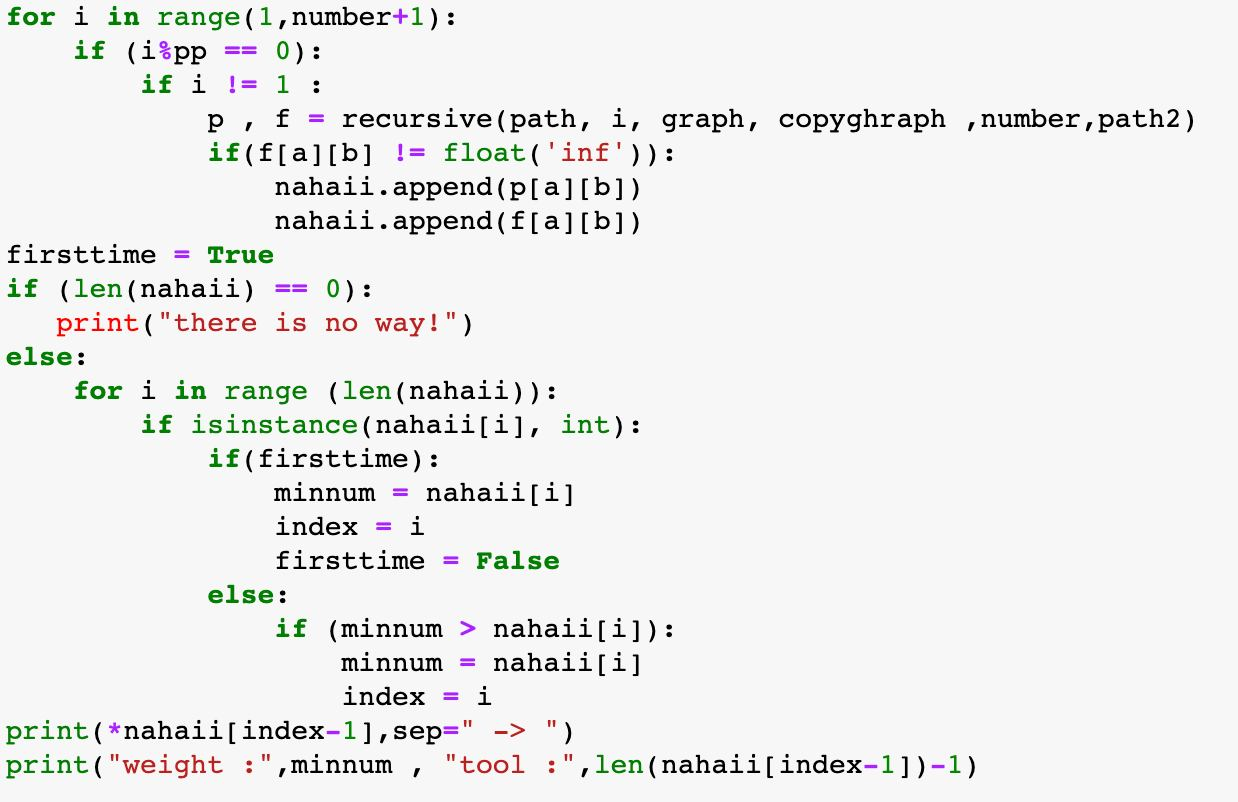

برای بخش دوم که در سوال ذکر شده بود الگوریتم رو بدین صورت پیاده سازی کردم که بین مسیر های ساخته شده صرفا مسیر با مینیمم وزن برداشته میشود و مسیر های کاندید دیگر مورد پذیرش واقع نمیشن و در نهایت به لیست در ایندکس مربوطه اضافه میشود

و در نهایت مینیمم مسیر با وزن کمتر به همراه مشخصات نمایش داده میشن چون حاصل تابع (findmin) مینیمم را نشان میدهد


که در تصاویر بالا مشخص هستش

پایان